# Classical Time Series Models: ARIMA (AutoRegressive Integrated Moving Average)

<div style="background-color: #e5d5ff ; line-height: 2em">

# 0. Unit Test: Common Functions

</div>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from src.datapipeline import run_datapipeline
from src.sarima_model import SarimaModel, sarima_forecast

def plot_forecast(test, forecast):
    # Plot the actual values and forecasted values for each model
    plt.figure(figsize=(20, 3))
    plt.plot(test.index, test.values, label='Test Data')
    plt.plot(test.index, forecast, label='Manual ARIMA Forecast')
    plt.title('Actual vs. Forecasted Values')
    plt.xlabel('Week')
    plt.ylabel('Number of Sales Orders')
    plt.legend()
    plt.show()


def compare_df(test, forecast):
    # Compare actual vs forecast
    compare_forecast = pd.DataFrame({
        "Actual Value": test,
        "Forecast": forecast
    }).astype(int).applymap('{:,}'.format)

    return compare_forecast


def load_data(data_dir, combine_data_only=True):
    # Load the data using the pipeline function
    df = run_datapipeline(data_dir, combine_data_only)

    # Resample the DataFrame by week and sum the 'num_orders' column
    ts = df['num_orders'].resample('W').sum()

    # Split the last 10 records as test series
    test = ts[-10:]
    train = ts[:-10]

    return train, test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\Admin\anaconda3\envs\miniproject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


sarima_model-2_1_1-1_1_1_52.pkl
Saving model


c:\Users\Admin\anaconda3\envs\miniproject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluate metric: 95258.80940192945


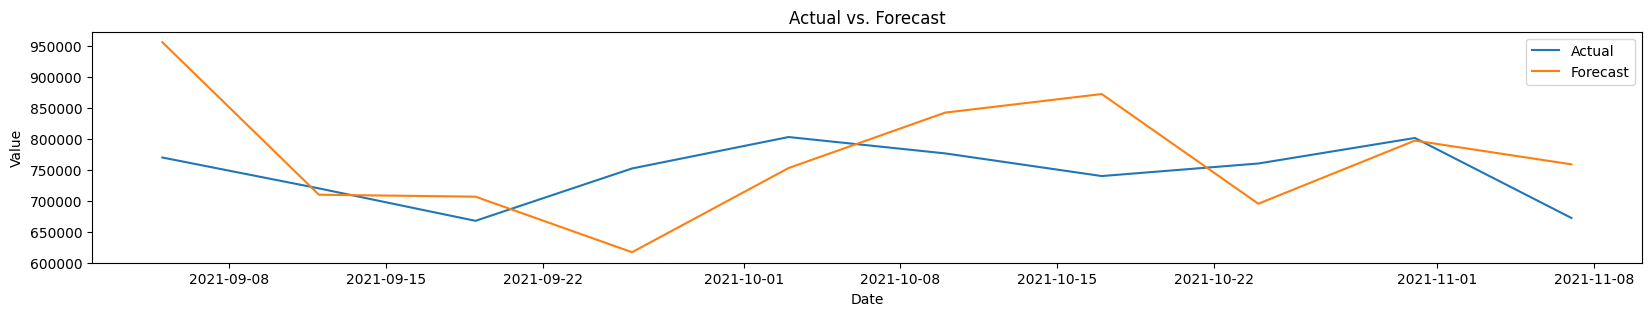

In [6]:
%load_ext autoreload
%autoreload 2

# SARIMA seasonal_order = (1, 1, 1, 52) - Rolling
model_r111 = sarima_forecast(order = (2, 1, 1), seasonal_order = (1, 1, 1, 52), rolling=True)

<div style="background-color: #e5d5ff ; line-height: 2em">

### 1. SARIMA - Rolling Forecast (1, 1, 1, 52)

</div>

In [2]:
import datetime
save_merged_df = os.path.join(os.getcwd(), 'data', 'merged.csv')

custom_date_parser = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv(save_merged_df,
                 parse_dates=['date'],
                 date_parser=custom_date_parser)

In [5]:
df.head()

,date,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,2019-01-28,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,2019-01-28,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,2019-01-28,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,2019-01-28,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,2019-01-28,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [3]:
# Test code: arima_model.py plus run_datapipeline
%load_ext autoreload
%autoreload 2

# Load the data using the pipeline function

# Relative path
data_dir = 'data'
train, test = load_data(data_dir=data_dir, combine_data_only=True)


In [4]:
train

date
2019-02-03     792261
2019-02-10     787084
2019-02-17     695262
2019-02-24     743529
2019-03-03    1198675
               ...   
2021-08-01     899953
2021-08-08     939374
2021-08-15     835583
2021-08-22     975072
2021-08-29     777106
Freq: W-SUN, Name: num_orders, Length: 135, dtype: int64

c:\Users\Admin\anaconda3\envs\miniproject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


0


c:\Users\Admin\anaconda3\envs\miniproject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
2
3
4
5
6
7
8
9
Evaluate performance using RMSE: 89102.64194080819


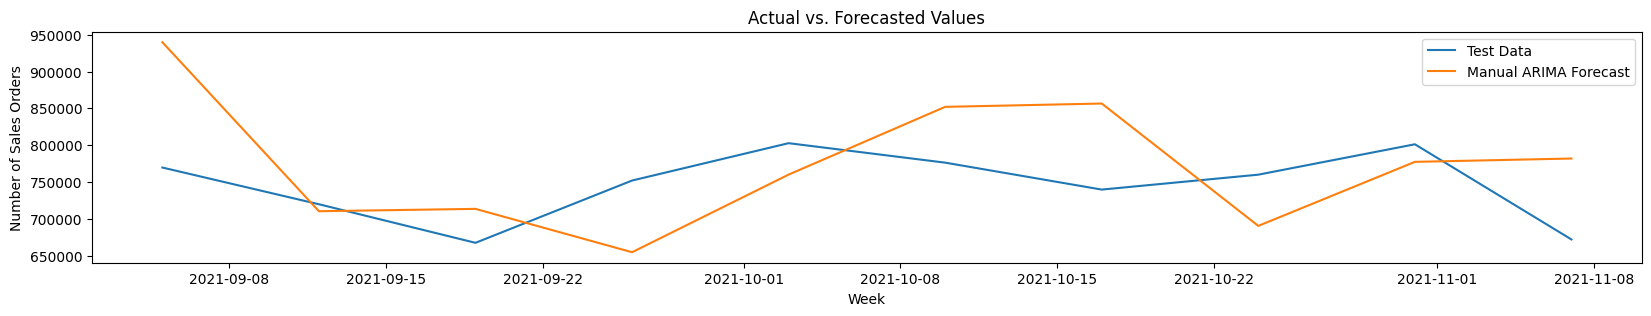

,Actual Value,Forecast
0,"769,623","939,827"
1,"719,740","710,262"
2,"667,343","713,461"
3,"751,935","654,575"
4,"802,689","760,018"
5,"776,240","852,039"
6,"739,661","856,552"
7,"759,926","690,336"
8,"801,197","777,314"
9,"671,926","781,855"


In [67]:
# Fit model
order = (1, 1, 1)
seasonal_order = (3, 1, 3, 52)
model = ArimaModel(train, order=order, seasonal_order=seasonal_order)

# Setting to decide whether to use arima/sarimax
seasonal_state = True

# Create string for model saving
order_str = '_'.join(str(s) for s in order)
season_str = '_'.join(str(s) for s in seasonal_order)

if seasonal_state:
    model_name = "sarima_model-{}-{}.pkl".format(order_str, season_str)

else:
    model_name = "arima_model-{}.pkl".format(order_str)
save_model_path = os.path.join("models", model_name)

model.fit(model_path=save_model_path, seasonal=seasonal_state )

# Forecast with given training and testing set
n_periods=test.shape[0]
forecast = model.rolling_forecast(train, test, seasonal=seasonal_state)

# Evaluate
print("Evaluate performance using RMSE:", model.evaluate(test, forecast))

# Visualize
plot_forecast(test, forecast)

# Compare actual vs forecast
compare_forecast = compare_df(test[-n_periods:].values, forecast)
compare_forecast

In [110]:
train_df = train.to_frame()
test_df = test.to_frame()
train_df.tail()

,num_orders
date,
2021-08-01,899953
2021-08-08,939374
2021-08-15,835583
2021-08-22,975072
2021-08-29,777106


In [109]:
test_df.head()

,num_orders
date,
2021-09-05 00:00:00,769623
2021-09-12 00:00:00,719740
2021-09-19 00:00:00,667343
2021-09-26 00:00:00,751935
2021-10-03 00:00:00,802689


#### Test load model

In [103]:
arima_model = "arima_model-1_1_1.pkl"
sarima_model = "sarima_model-1_1_1-3_1_3_52.pkl"
# Change here to point to right model
selected_model = sarima_model

In [104]:
def extract_info_model_name(selected_model_name):
    temp_name = selected_model_name.replace(".pkl","")
    if temp_name.startswith('a'):
        temp_name_list = temp_name.split("-")
        order_info = tuple([int(i) for i in temp_name_list[1].split("_")])
        seasonal_order_info = None
    else:
        temp_name_list = temp_name.split("-")
        order_info = tuple([int(i) for i in temp_name_list[1].split("_")])
        seasonal_order_info = tuple([int(i) for i in temp_name_list[2].split("_")])
    
    return order_info, seasonal_order_info
order_info, seasonal_order_info = extract_info_model_name(selected_model)
print(order_info, seasonal_order_info)

(1, 1, 1) (3, 1, 3, 52)


In [111]:
# Quick forecasting
model = ArimaModel(train, order=order_info, seasonal_order=seasonal_order_info)
model_path_to_load = os.path.join("models", "Statistical Model", selected_model)
model.load_model(load_model_path = model_path_to_load)


test_df['forecast'] = model.forecast(n_periods=30)

In [112]:
test_df.head()

,num_orders,forecast
date,,
2021-09-05 00:00:00,769623,939827.991515
2021-09-12 00:00:00,719740,815553.959959
2021-09-19 00:00:00,667343,795159.731668
2021-09-26 00:00:00,751935,761518.486956
2021-10-03 00:00:00,802689,800469.638499


In [ ]:

# Forecast (arima/sarima order is now provided during instantiated together with model )
n_periods=test.shape[0]
forecast = model.rolling_forecast(train, test, seasonal=True)

# Evaluate loss
print("Evaluate performance using RMSE:", model.evaluate(test, forecast))

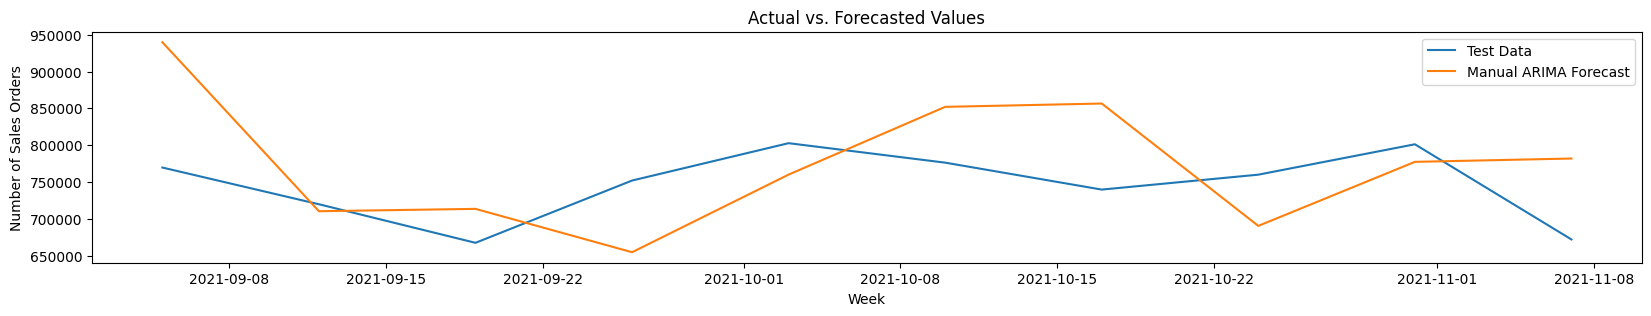

,Actual Value,Forecast
0,"769,623","939,827"
1,"719,740","710,262"
2,"667,343","713,461"
3,"751,935","654,575"
4,"802,689","760,018"
5,"776,240","852,039"
6,"739,661","856,552"
7,"759,926","690,336"
8,"801,197","777,314"
9,"671,926","781,855"


In [55]:
# Visualize
plot_forecast(test, forecast)

# Compare actual vs forecast
compare_forecast = compare_df(test[-n_periods:].values, forecast)
compare_forecast

In [60]:
ts

date
2019-02-03     792261
2019-02-10     787084
2019-02-17     695262
2019-02-24     743529
2019-03-03    1198675
               ...   
2021-08-01     899953
2021-08-08     939374
2021-08-15     835583
2021-08-22     975072
2021-08-29     777106
Freq: W-SUN, Name: num_orders, Length: 135, dtype: int64

<div style="background-color: #e5d5ff ; line-height: 2em">

### 2. SARIMA - Rolling Forecast (2, 1, 4, 52)

</div>

In [4]:
# Test code: arima_model.py plus run_datapipeline
%load_ext autoreload
%autoreload 2
import pandas as pd
from src.datapipeline import run_datapipeline
from src.arima_model import ArimaModel


# Load the data using the pipeline function
ts, test = load_data()

# Fit model
order = (2, 1, 4)
seasonal_order = (2, 1, 4, 52)
model = ArimaModel(ts, order=order, seasonal_order=seasonal_order)
model.fit("models/sarima_model_rolling_214.pkl", seasonal=True)

# Forecast
n_periods=test.shape[0]
forecast = model.rolling_forecast(ts, test, order, seasonal_order, seasonal=True)

# Evaluate
print("Evaluate performance using RMSE:", model.evaluate(test, forecast))

# Visualize
plot_forecast(test, forecast)

# Compare actual vs forecast
compare_forecast = compare_df(test[-n_periods:].values, forecast)
compare_forecast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

KeyboardInterrupt: 

<div style="background-color: #e5d5ff ; line-height: 2em">

### 3. SARIMA - Focast (1, 1, 1, 52)

</div>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

Evaluate performance using RMSE: 126475.14672581162


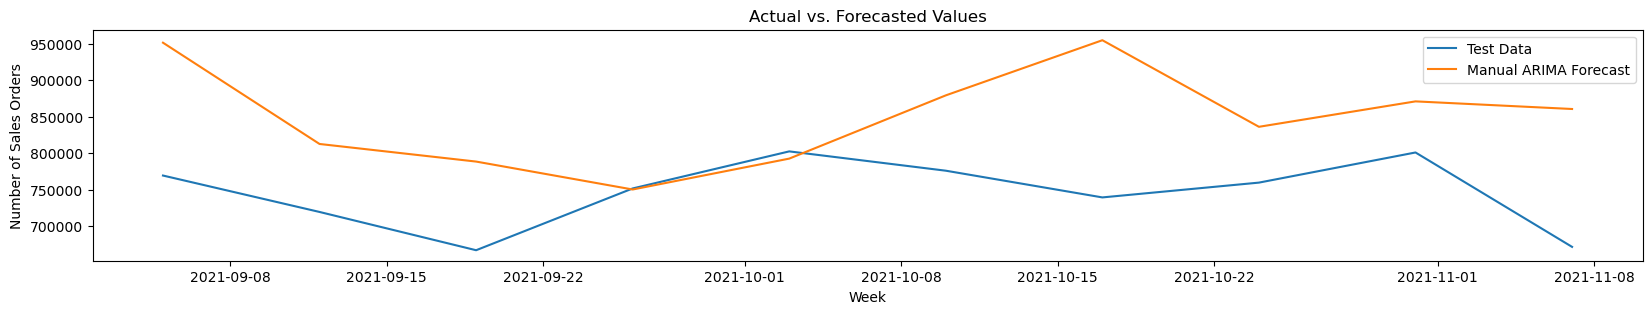

,Actual Value,Forecast
2021-09-05,"769,623","951,532"
2021-09-12,"719,740","812,833"
2021-09-19,"667,343","788,743"
2021-09-26,"751,935","750,497"
2021-10-03,"802,689","792,799"
2021-10-10,"776,240","879,401"
2021-10-17,"739,661","954,916"
2021-10-24,"759,926","836,350"
2021-10-31,"801,197","871,173"
2021-11-07,"671,926","860,737"


In [3]:
# Test code: arima_model.py plus run_datapipeline
%load_ext autoreload
%autoreload 2
import pandas as pd
from src.datapipeline import run_datapipeline
from src.arima_model import ArimaModel


# Load the data using the pipeline function
ts, test = load_data()

# Fit model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)
model = ArimaModel(ts, order=order, seasonal_order=seasonal_order)
model.fit("models/sarima_model_111.pkl", seasonal=True)

# Forecast
n_periods=test.shape[0]
forecast = model.forecast(n_periods)

# Evaluate
print("Evaluate performance using RMSE:", model.evaluate(test, forecast))

# Visualize
plot_forecast(test, forecast)

# Compare actual vs forecast
compare_forecast = compare_df(test[-n_periods:].values, forecast)
compare_forecast

<div style="background-color: #e5d5ff ; line-height: 2em">

### 4. Grid Searching SARIMA Model Hyperparameters

</div>

In [ ]:
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

<div style="background-color: #e5d5ff ; line-height: 2em">

# Research - Ignore this section

</div>

Todo: [How to Grid Search SARIMA Hyperparameters for Time Series Forecasting](https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/)

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting. Although the method can handle data with a trend, it does not support time series with a seasonal component. That is a time series with a repeating cycle.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with trend and seasonal componenst.

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

Trend Elements: There are three trend elements that require configuration.
- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

Seasonal Elements: There are four seasonal elements that are not part of ARIMA that must be configured; they are:
- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m





The trend elements can be chosen through careful analysis of ACF and PACF plots looking at the correlations of recent time steps (e.g. 1, 2, 3).

Similarly, ACF and PACF plots can be analyzed to specify values for the seasonal model by looking at correlation at seasonal lag time steps. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/


source: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ 

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. The parameters of the ARIMA model are defined as follows:
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

This dataset describes the weekly number of order of food demand over a 3 year period, for a meal delivery company which operates in multiple cities. We can see that the Shampoo Sales dataset has a clear up trend till June 2020. This suggests that the time series is not stationary. We  and will require differencing to make it stationary. We use Augmented Dickey-Fuller test to determine the difference order of 1. 



d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)


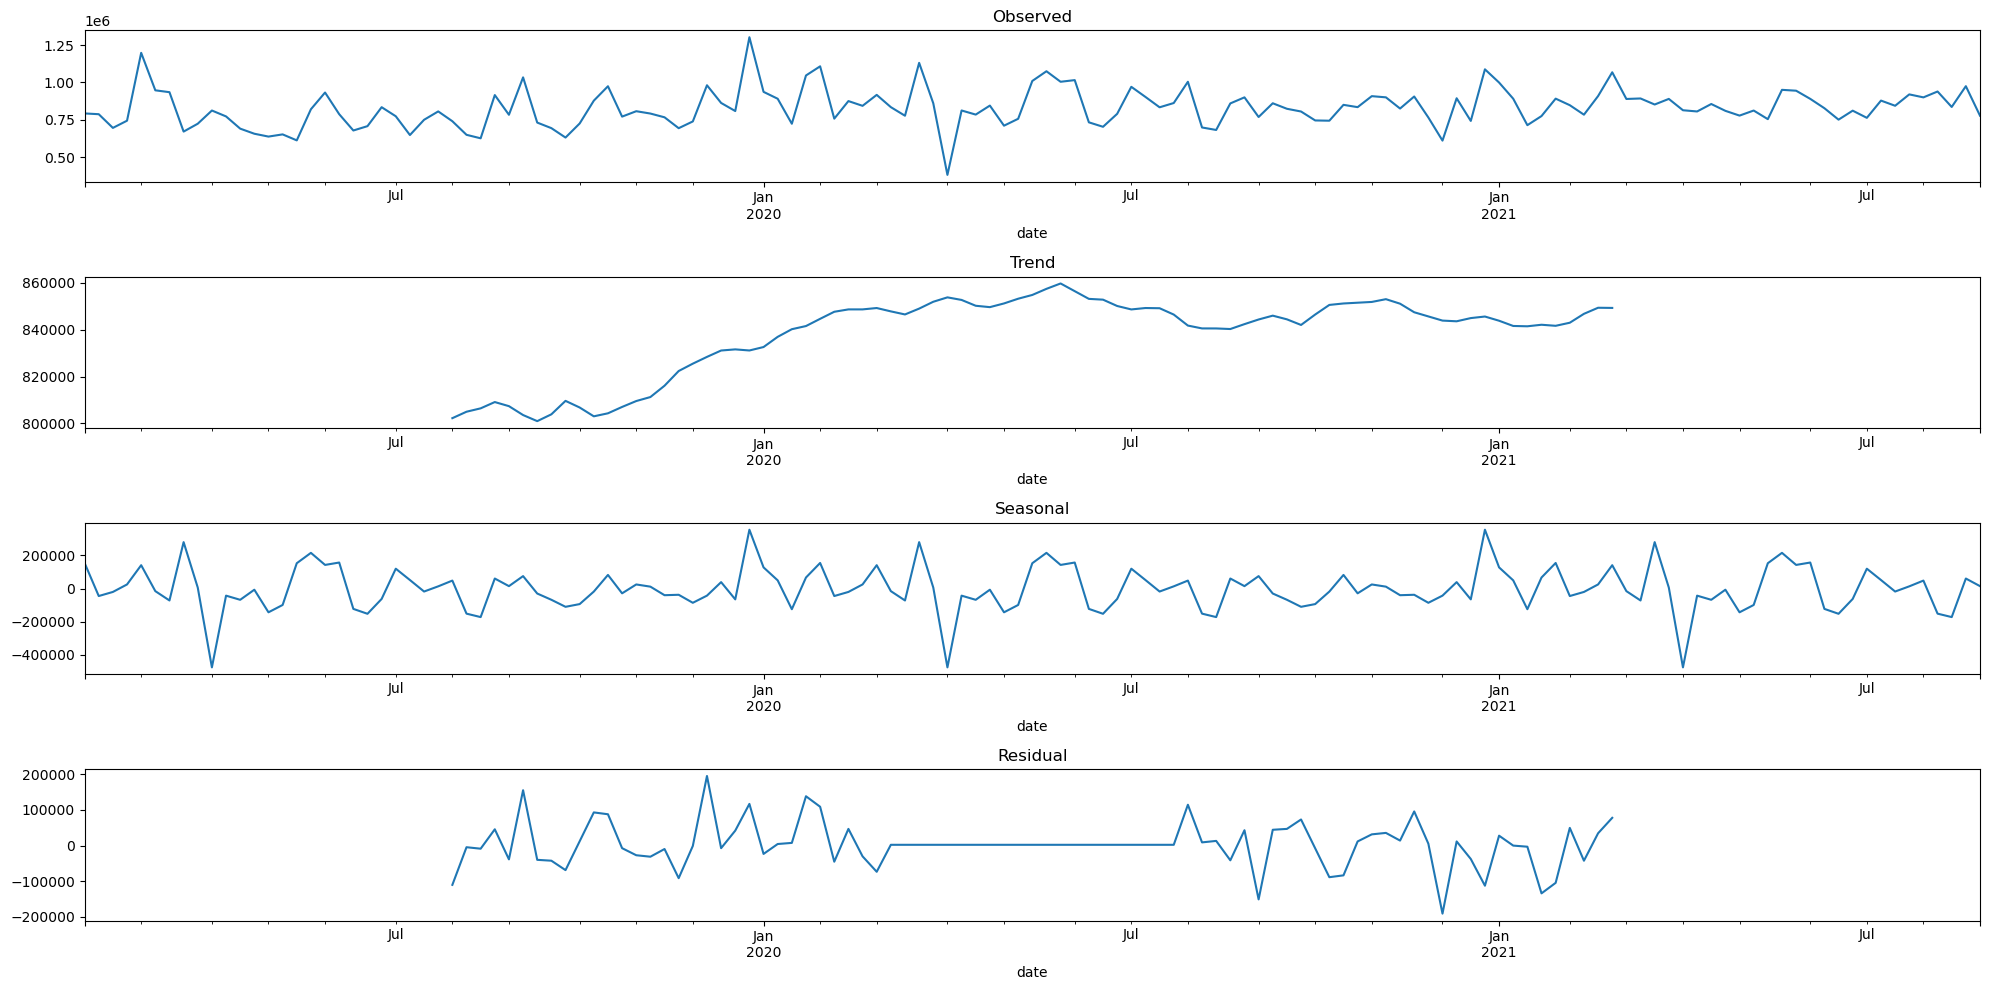

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data using the pipeline function
ts, test = load_data()

# Perform the seasonal decomposition
result = seasonal_decompose(ts)

# Plot the decomposed time series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10))
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()

In [7]:
# Checking stationarity: Augmented Dickey-Fuller test
# ADF Test: If p-value < 5% reject null hypothesis (non-stationary)
from statsmodels.tsa.stattools import adfuller

print("Checking stationarity: Augmented Dickey-Fuller test: ts")
adfuller_result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:\t', f'   {key}, {value}')

Checking stationarity: Augmented Dickey-Fuller test: ts
ADF Statistic: -2.4974620661582505
p-value: 0.1160930532990263
Critial Values:	    1%, -3.4837793736959997
Critial Values:	    5%, -2.88495387648
Critial Values:	    10%, -2.579256976


<div style="background-color: #e5d5ff ; line-height: 2em">

### Checking stationarity - Constant mean. Constant variance. Autocovariance that does not depend on time
- In ADF, 
  - the **null hypothesis** is that a unit root is present in the time series, which means that the `time series is non-stationary`.
  - the alternative hypothesis is that the time series is stationary
  - The `ADF statistic` is -2, and value is negative, which means that the sample mean is below the null hypothesis, suggesting that the time series may be `non-stationary`.
  - The `p-value` is 0.189, assuming that the `null hypothesis is true`. In other words, it is the probability of obtaining the observed result by chance. In this case, the p-value is greater than the significance level of 0.05, which means that we cannot reject the null hypothesis at the 5% significance level.
  - The ADF statistic of -2 `falls between the 5% and 10% critical values`, but is `greater than the 1% critical value`. This means that we cannot reject the null hypothesis at the 5% significance level, but we can reject it at the 1% significance level. Therefore, we have `weak evidence to suggest that the time series may be stationary`.

Based on the result below, we conclude that the time series is **non-stationary** based on the results above. The ADF Statistic is greater than the critical values at all significance levels, and the p-value is greater than the significance level of 0.05. Therefore, we `fail to reject` the null hypothesis and conclude that the time series is non-stationary.

</div>

In [8]:
# The time series data is non-stationary - take the first difference of the time series
print("\nCheck if the differenced time series is stationary: ts_diff")
ts_diff = ts.diff().dropna()

# Check if the differenced time series is stationary
result_diff = adfuller(ts_diff, autolag='AIC')
print('ADF Statistic (differenced): %f' % result_diff[0])
print('p-value (differenced): %f' % result_diff[1])
print('Critical Values (differenced):')

for key, value in result_diff[4].items():
    print('Critial Values:\t', f'   {key}, {value}')


Check if the differenced time series is stationary: ts_diff
ADF Statistic (differenced): -6.494228
p-value (differenced): 0.000000
Critical Values (differenced):
Critial Values:	    1%, -3.4837793736959997
Critial Values:	    5%, -2.88495387648
Critial Values:	    10%, -2.579256976


<div style="background-color: #e5d5ff ; line-height: 2em">

### Transform the original time series 'ts' to the stationary differenced time series 'ts_diff'

The **ADF statistic** is `-6`, which is `less than the critical value at the 1%, 5%, and 10% levels`. This means that we can `reject the null hypothesis` that the differenced time series is non-stationary, and conclude that **the differenced time series is stationary**.

The p-value is very small (close to 0), which further supports the conclusion that the differenced time series is stationary. The critical values at the 1%, 5%, and 10% levels are all less than the ADF statistic, providing additional evidence that the differenced time series is stationary.

In summary, the result of the ADF test after differencing suggests that the time series has become stationary, which is a desirable property for many time series analysis techniques. The **d** value can be determined by looking at the level of differencing required to make the time series stationary. Here, the value of d is 1.

### Use the ACF and PACF plots can be used to identify the p and q values for the ARIMA model
- For the ACF plot, the first significant lag that crosses the confidence interval suggests the value of **q**. Here, the value of q is 1.
- For the PACF plot, the first significant lag that crosses the upper confidence interval suggests the value of **p**. Here, the value of p is 1.

</div>

ACF values: [ 1.00000000e+00 -3.10267454e-01 -1.78972371e-01 -8.02587693e-02
  7.67152687e-02  7.81868176e-02 -2.04003940e-01  3.72505892e-02
  2.78384764e-01 -2.53869638e-01  1.45435040e-02  5.44591067e-02
  4.92264286e-02  2.14196098e-04 -2.28368206e-01  1.93930486e-01
  8.94511261e-02 -1.79094906e-01  6.16800154e-02  1.43761075e-02
 -5.82903176e-02]

PACF values: [ 1.00000000e+00 -3.12600292e-01 -3.09662953e-01 -3.10482299e-01
 -1.88354005e-01 -6.94586756e-02 -3.14810999e-01 -2.65582270e-01
  1.22974027e-01 -2.60136700e-01 -1.52399804e-01 -8.81914592e-03
 -8.30809594e-02 -1.73344663e-02 -2.00377971e-01 -7.23988415e-02
  3.46728304e-04 -1.42727517e-01 -4.40310514e-02 -1.52055762e-02
 -3.04897115e-01]


c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


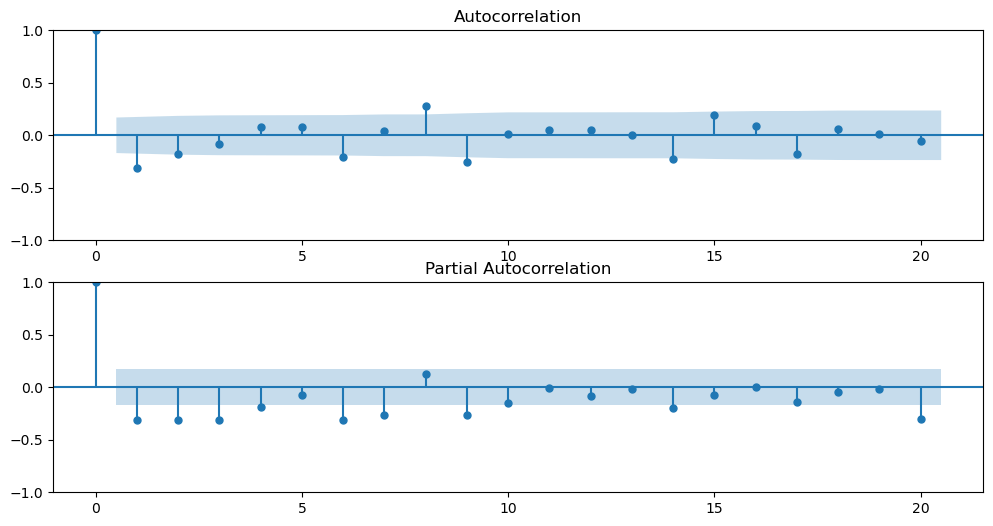

In [9]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

lags = 20

# Compute the ACF - the autocorrelation between an observation and another observation at a prior time step that includes 'direct' and 'indirect' dependence information
acf_values = acf(ts_diff, nlags=lags)
print("ACF values:", acf_values)

# Compute the PACF - the 'direct' relationship between an observation and its lag
pacf_values = pacf(ts_diff, nlags=lags)
print("\nPACF values:",pacf_values)

# Visualize the ACF and PACF of the time series
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff.dropna(),lags=lags,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff.dropna(),lags=lags,ax=ax2)
plt.show()

<div style="background-color: #e5d5ff ; line-height: 2em">

## Create Models - ARIMA, ARIMA (manual differenced time series), AUTO_ARIMA

</div>

In [11]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Use manually selected parameters to fit ARIMA model - use AR(1) model with a MA component of order 1.
model_111 = ARIMA(ts, order=(1, 1, 1)).fit()
print('\nManual ARIMA summary: order=(1, 1, 1)')
print(model_111.summary())

# Use auto_arima to identify optimal parameters for ARIMA model
model_auto = auto_arima(ts)
print('Auto-ARIMA summary:')
print(model_auto.summary())

# Use manually selected parameters to fit ARIMA model - use AR(1) model with a MA component of order 1.
model_214 = ARIMA(ts, order=(2, 1, 4)).fit()
print('\nManual ARIMA summary: order=(2, 1, 4)')
print(model_214.summary())


c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Manual ARIMA summary: order=(1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  135
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1769.493
Date:                Fri, 14 Apr 2023   AIC                           3544.987
Time:                        16:48:08   BIC                           3553.680
Sample:                    02-03-2019   HQIC                          3548.519
                         - 08-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2891      0.098      2.943      0.003       0.097       0.482
ma.L1         -0.9519      0.026    -36.819      0.000      -1.003      -0.901
sigma2       

c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


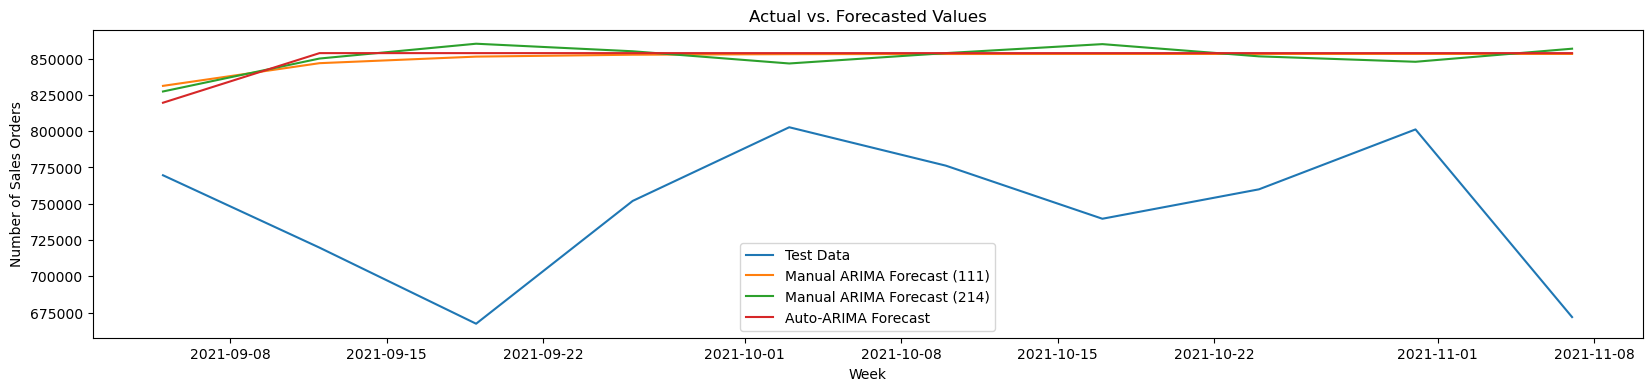

,Actual Value,Manual ARIMA forecast (111),Manual ARIMA forecast (214),Auto-ARIMA forecast
2021-09-05,"769,623","831,198","827,333","819,580"
2021-09-12,"719,740","846,834","850,031","853,765"
2021-09-19,"667,343","851,354","860,233","853,765"
2021-09-26,"751,935","852,660","855,033","853,765"
2021-10-03,"802,689","853,038","846,627","853,765"
2021-10-10,"776,240","853,147","853,765","853,765"
2021-10-17,"739,661","853,178","859,955","853,765"
2021-10-24,"759,926","853,187","851,537","853,765"
2021-10-31,"801,197","853,190","847,796","853,765"
2021-11-07,"671,926","853,191","856,805","853,765"


In [12]:
import matplotlib.pyplot as plt

# Make 10 forecast values using each of the models
steps = test.shape[0]
forecast_111 = model_111.forecast(steps=steps)
forecast_214 = model_214.forecast(steps=steps)
forecast_auto = model_auto.predict(n_periods=steps)

# Create a DataFrame to hold the actual and forecasted values
df_forecasts = pd.DataFrame({
    "Actual Value": test.values,
    "Manual ARIMA forecast (111)": forecast_111,
    "Manual ARIMA forecast (214)": forecast_214,
    "Auto-ARIMA forecast": forecast_auto
})

# Plot the actual values and forecasted values for each model
plt.figure(figsize=(20, 4))
#plt.plot(ts.index, ts.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data')
plt.plot(test.index, forecast_111, label='Manual ARIMA Forecast (111)')
plt.plot(test.index, forecast_214, label='Manual ARIMA Forecast (214)')
plt.plot(test.index, forecast_auto, label='Auto-ARIMA Forecast')
plt.title('Actual vs. Forecasted Values')
plt.xlabel('Week')
plt.ylabel('Number of Sales Orders')
plt.legend()
plt.show()

df_forecasts.astype(int).applymap('{:,}'.format)